# Loan pridiction Dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Question 1: What are the number of missing values of the different attributes?

In [2]:
df.isnull().sum(axis = 0)


ID                   0
Age                  0
Experience           0
Income               0
ZIP Code             0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

## Question 2: How could you handle missing values if they are present?


if there were any missing values:<br>
in case the column is numerical:<br>
We could impute them by the mean/median of the related feature.<br>
in case the column is categorical:<br>
we replace the missing values with the most frequent value.<br>

also we can use linear regression/linear classification to predict the missing values.
or other machine learning algorithm-based imputers like KNNImputer to fill the missing values using the nearest neighbour algorithm.and Random Forest algorithm.

## Question 3: Are there extreme values of the independent attributes?

In [3]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
def plot_violin_boxplot(data):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,8 ))

    # plot violin plot
    axs[0].violinplot(data,
                  showmeans=False,
                  showmedians=True)
    axs[0].set_title('violin plot')

    # plot box plot
    axs[1].boxplot(data)
    axs[1].set_title('Box plot')

    # adding horizontal grid lines
    for ax in axs:
        ax.yaxis.grid(True)
   

    plt.show()

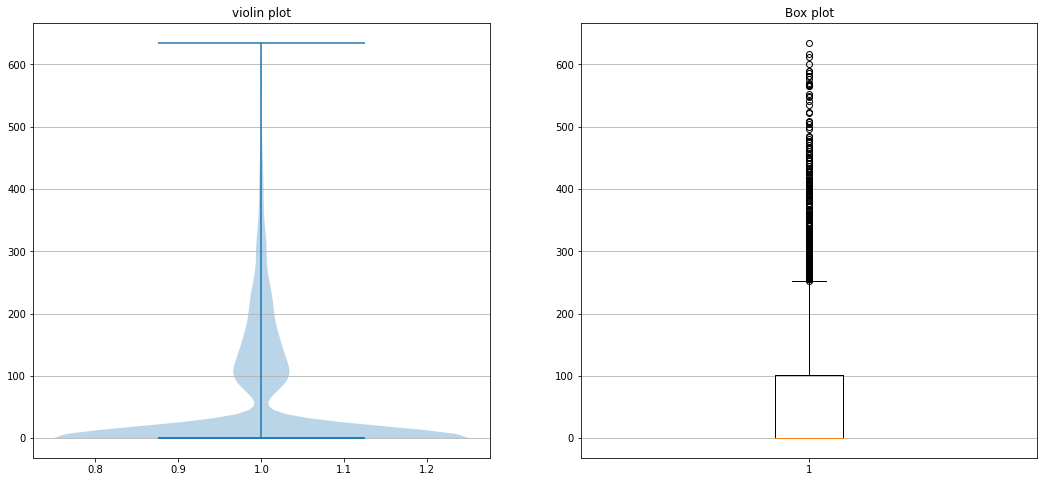

In [5]:
plot_violin_boxplot(df[["Mortgage"]]) 


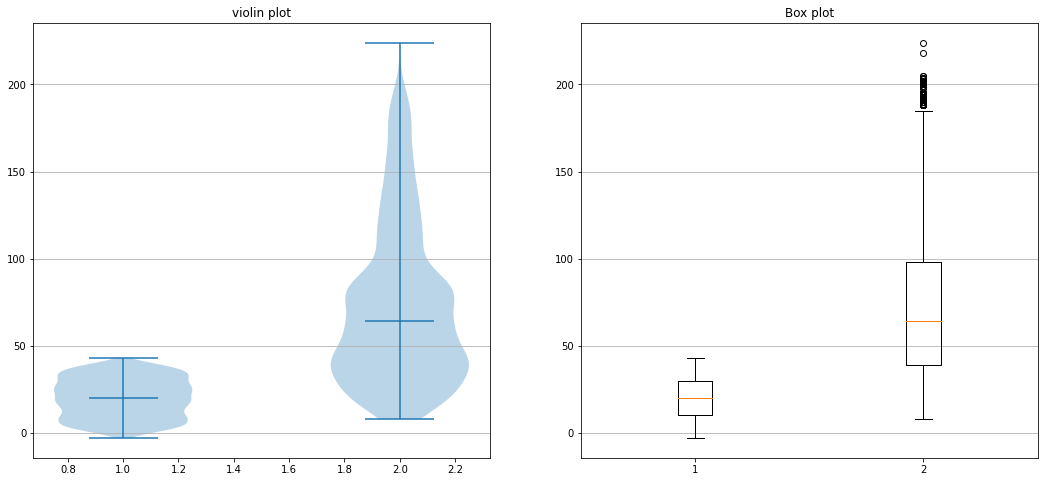

In [6]:
plot_violin_boxplot(df[["Experience","Income"]]) 


In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

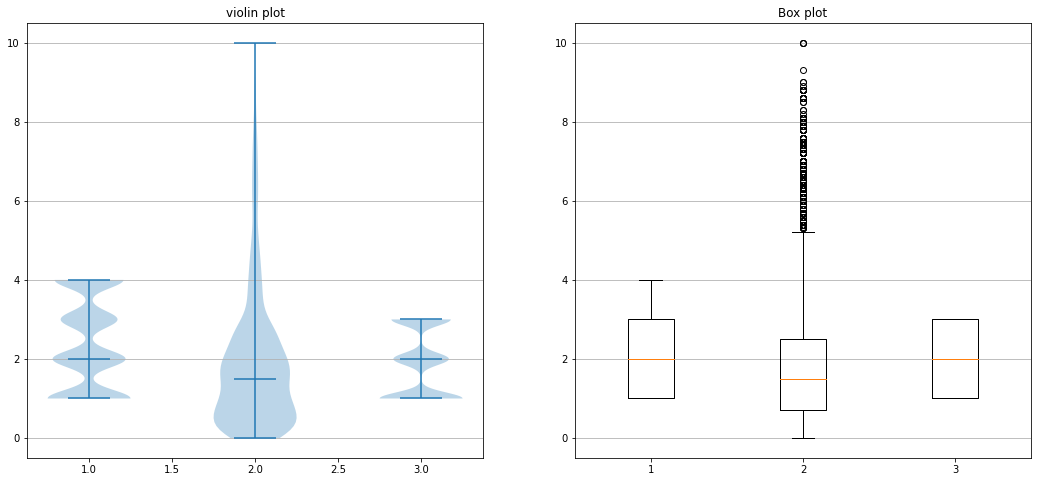

In [8]:
plot_violin_boxplot(df[["Family", "CCAvg", "Education"]]) 


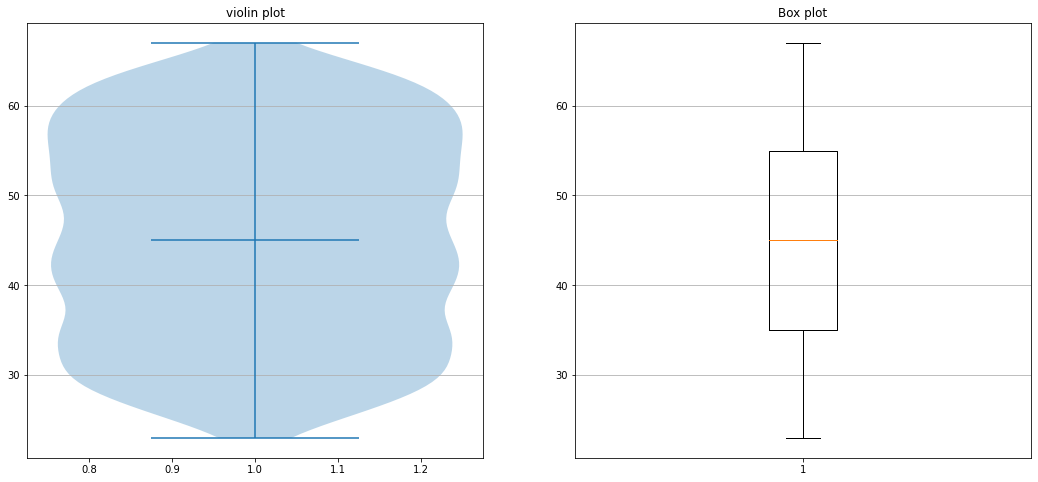

In [9]:
plot_violin_boxplot(df[["Age"]]) 


Based on df.describe,the violin plot and boxplot, we notice:<br>

-the maximum of the **income, Mortgage, CCAvg** features are very far from their mean values<br>
-Mortgage,	SecuritiesAccount,	CDAccount,	Online,	CreditCard are **binary variables**<br>
-Family and Education are **Label Encoded**<br>

Min of column **Experience** is negative, which is illogical<br>
Min of column **Income** is 8000 , we need to verify this, it's unlikely to live off with 8000$ of an annual income, we need to check the zipcode. and verify if you can live with that amount of money in that place. 

## Question 4:  How could you handle extreme values if they are present?
-We can drop the outliers<br>
-We can set up a filter ( like in the case of the negative income feature)<br>
-We can handle outliers using IQR method ( IQR = Q3-Q1)<br>

### Question 5:  Compute the mean, standard deviation and quartiles of the incomes of the two groups (customers who accepted and not the loan). Interpret.


In [10]:
group_1 = df[df["PersonalLoan"]==0].describe()
group_2 = df[df["PersonalLoan"]==1].describe()
print("customers who did not accept the loan")
print(group_1["Income"])
print("customers who did accept the loan")
print(group_2["Income"])


customers who did not accept the loan
count    4520.000000
mean       66.237389
std        40.578534
min         8.000000
25%        35.000000
50%        59.000000
75%        84.000000
max       224.000000
Name: Income, dtype: float64
customers who did accept the loan
count    480.000000
mean     144.745833
std       31.584429
min       60.000000
25%      122.000000
50%      142.500000
75%      172.000000
max      203.000000
Name: Income, dtype: float64


### Question 6: Produce the scatter diagram of Age * Experience. Highlight the two groups (customers who accepted and not the loan). Interpret. (Hint. Use any descriptive measure to motivate your answer).

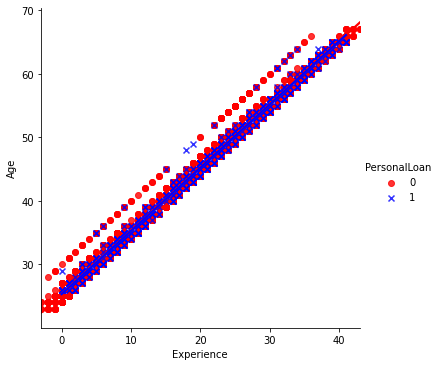

In [11]:
color_dict = dict({1:'blue',
                  0:'red'})
g = sns.lmplot(x="Experience", y="Age", hue="PersonalLoan",
              data=df, palette=color_dict, 
                   legend='full', markers=["o", "x"])


Age is Highly correlated with Experience

In [12]:
df[["Age","Experience"]].corr(method ='pearson')

,Age,Experience
Age,1.000000,0.994215
Experience,0.994215,1.000000


### Question 7:  Describe the relationship between ‘Education’ and ‘Personal loan’

In [13]:
spearman_corr = df[["Education","PersonalLoan"]].corr(method= "spearman")
pearson_corr =  df[["Education","PersonalLoan"]].corr()
print("Spearman's correlation: ")
print(spearman_corr)

print("\nPearson's correlation: ")
print(pearson_corr)

Spearman's correlation: 
              Education  PersonalLoan
Education      1.000000      0.139492
PersonalLoan   0.139492      1.000000

Pearson's correlation: 
              Education  PersonalLoan
Education      1.000000      0.136722
PersonalLoan   0.136722      1.000000


###  Question8: How could you consider the variable education in your analysis?

the pearson/spearman correlation between Education and PersonalLoan is very low. We could check for non linear correlation using mutual information, and see if the scoring of p-value. 

## Part II

 ### Question 10: Handle the categorical variables

In [14]:
## Convert Categorical Columns to Dummies
categorical_cols = ["Family","SecuritiesAccount","CDAccount","Online","CreditCard"]
data = pd.get_dummies(df,columns=categorical_cols,drop_first=True,)

In [15]:
drop_cols=['ID',"ZIP Code","Education"]
for col in drop_cols:
    data.drop([col],axis=1,inplace=True)

data.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'PersonalLoan',
       'Family_2', 'Family_3', 'Family_4', 'SecuritiesAccount_1',
       'CDAccount_1', 'Online_1', 'CreditCard_1'],
      dtype='object')

 ### Question 9: Form a training (60%) and test samples (40%). 

In [16]:
from sklearn.model_selection import train_test_split

y = data["PersonalLoan"]
X = data.copy().drop("PersonalLoan",axis=1)

## Split the data into trainx, testx, trainy, testy with test_size = 0.20 using sklearn
trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.40)

## Print the shape of X_train, X_test, y_train, y_test
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(3000, 12)
(2000, 12)
(3000,)
(2000,)


In [17]:
from sklearn.preprocessing import  StandardScaler, RobustScaler
# x= (x-Xmed) / x75-XT25 
## Scale the numeric attributes
scaler = RobustScaler()
scaler.fit(trainx.iloc[:,:5])

trainx.iloc[:,:5] = scaler.transform(trainx.iloc[:,:5])
testx.iloc[:,:5] = scaler.transform(testx.iloc[:,:5])

C:\Users\medsa\Anaconda3\envs\zindi\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\medsa\Anaconda3\envs\zindi\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [18]:
trainx.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,SecuritiesAccount_1,CDAccount_1,Online_1,CreditCard_1
585,-0.55,-0.80,0.306452,1.315789,0.00,0,0,1,0,0,1,0
2419,0.90,0.85,-0.322581,-0.263158,0.00,1,0,0,0,0,1,0
3452,0.80,0.85,-0.661290,-0.578947,0.00,0,1,0,0,0,0,0
250,-0.75,-0.70,-0.564516,-0.263158,1.17,0,1,0,0,0,0,0
2096,0.50,0.45,-0.161290,0.421053,0.93,1,0,0,0,0,0,0


### Question 11: Construct two classifiers using logistic regression and support vector machines (SVM) and produce the respective confusion matrices. Interpret.


#### Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(trainx , trainy)
ypred = model.predict(testx)


In [20]:
accuracy = accuracy_score(testy,ypred)
print(accuracy)

print(classification_report(testy, ypred))

0.9445
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1824
           1       0.76      0.53      0.63       176

    accuracy                           0.94      2000
   macro avg       0.86      0.76      0.80      2000
weighted avg       0.94      0.94      0.94      2000



**Interpretation:** <br>
We can see that our model is performing badly in predicting the 1 class.
this is due to the fact that our data set is unbalanced.
We call this kind of models a dummy model, where in our case it always predicts 0 and reachs accuracy of : count(0 class)/(count(0 class)+ count(1 class))

In [21]:
y.value_counts()[0]/(y.value_counts()[0]+y.value_counts()[1])

0.904

#### SVM Model

In [22]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(trainx,trainy)
y_pred_svm=svm.predict(testx)

accuracy_svm = accuracy_score(testy,y_pred_svm)
print(accuracy_svm)

print(classification_report(testy,y_pred_svm))

0.9505
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1824
           1       0.93      0.47      0.63       176

    accuracy                           0.95      2000
   macro avg       0.94      0.73      0.80      2000
weighted avg       0.95      0.95      0.94      2000



the svm model has improved the precision

##### Grid Search using SVM model

In [23]:
from sklearn.model_selection import GridSearchCV

svc_grid = SVC()
 

param_grid = {

'C': [0.001, 0.01, 0.1, 1, 10],
'gamma': [0.001, 0.01, 0.1, 1], 
'kernel':['linear','rbf']}

 
svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 10)
svc_cv_grid.fit(X = trainx, y = trainy)
print(svc_cv_grid.best_score_,svc_cv_grid.best_params_)

0.9493333333333333 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [24]:
best_svc = svc_cv_grid.best_estimator_
pred_test_svc = best_svc.predict(testx)
print(classification_report(testy,pred_test_svc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1824
           1       0.93      0.53      0.67       176

    accuracy                           0.95      2000
   macro avg       0.94      0.76      0.82      2000
weighted avg       0.95      0.95      0.95      2000



**Interpretation:**<br>
grid searching svm helped us improve the precision and recall on the 1-class. the parameters helped our model generalize more.

### Question 12: How SVM is used for classification?

SVM uses a kernel to transform your data and then we perform classification by finding an optimal boundary (hyperplan) to differentiate the two classes.
the kernal function takes low dimensional input space and transforms it to a higher dimensional space. it converts not separable problem to separable problem. It is mostly useful in non-linear separation problem.

### Question 13: Use ensemble methods to construct classifiers (bagging and boosting) and produce the confusion matrices. Interpret.

In [27]:
from sklearn import metrics
def results(y_pred,testy,model_str):
    print('The accuracy for '+model_str+' is:',metrics.accuracy_score(y_pred,testy))
   
    fpr,tpr,th=metrics.roc_curve(testy,y_pred)
    auc=metrics.auc(fpr,tpr)
    
    plt.plot(fpr,tpr,label=model_str+"  :AUC=%.2f"%auc)    
    plt.xlabel ("FPR")
    plt.ylabel("TPR")

    plt.legend(loc="lower right")
    
    plt.plot(fpr,tpr,label=model_str+"   :AUC=%.2f"%auc)
    print(classification_report(testy,y_pred))

### Bagging Decision trees

The accuracy for Bagging decision tree is: 0.9595
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1824
           1       0.85      0.65      0.74       176

    accuracy                           0.96      2000
   macro avg       0.91      0.82      0.86      2000
weighted avg       0.96      0.96      0.96      2000



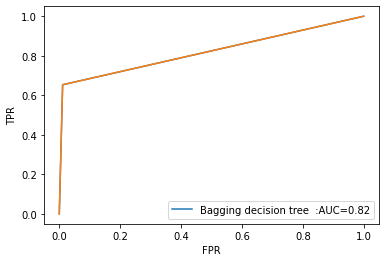

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(trainx,trainy)

y_pred_bdt_clf=bagging_clf.predict(testx)
results(y_pred_bdt_clf,testy, "Bagging decision tree")

**interpretation:**<br> As  we can see bagging decision trees performed much better than the previous models. the precision and recall for class-1 has improved.

### XGboost Model

In [29]:
y.value_counts()


0    4520
1     480
Name: PersonalLoan, dtype: int64

Our dataset is extremely unbalanced , so we'll take that into consideration and pass a scale_pos_weight parameter to xgboost<br>
scale_pos_weight = sqrt(count(negative examples)/count(Positive examples))<br>
we could also use SMOTE technique.

In [1]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, KFold

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


def train_xgb_crossvalidated(
        X_train: pd.DataFrame, y_train:pd.DataFrame, parameters: dict
) -> XGBClassifier:

    param_dist = {'n_estimators': stats.randint(1, 100),
                  'learning_rate': stats.uniform(0.01, 0.6),
                  }
    kfold = KFold(n_splits=int(parameters['k']),
                  shuffle=parameters['k_shuffle'],
                  random_state=int(parameters['random_state']))
    xgbmodel = XGBClassifier( use_label_encoder=False,scale_pos_weight=parameters['scale_pos_weight'])
   
    xgb_clf = RandomizedSearchCV(xgbmodel, param_distributions=param_dist,
                                 n_iter=int(parameters['n_iter']), scoring=parameters['scoring'],
                                 error_score=parameters['error_score'], verbose=int(parameters['verbose']),
                                 n_jobs=int(parameters['n_jobs'],), cv=kfold, 
                                 random_state=int(parameters['random_state']))
    xgb_clf.fit(X_train, y_train.values.ravel())
    return xgb_clf

NameError: name 'pd' is not defined

In [ ]:
import math
params={'k':5,'k_shuffle':True,'random_state':42,'subsample':0.5,'n_iter':10, 'scoring' : 'roc_auc', 
                         'error_score' : 0,'verbose' : 3 , 'n_jobs':3, 'scale_pos_weight' : math.sqrt(4520/480)

}
xgb= train_xgb_crossvalidated(trainx,trainy,params)

The accuracy for XGBoost Classifier is: 0.961


C:\Users\medsa\Anaconda3\envs\zindi\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1824
           1       0.79      0.76      0.77       176

    accuracy                           0.96      2000
   macro avg       0.88      0.87      0.88      2000
weighted avg       0.96      0.96      0.96      2000



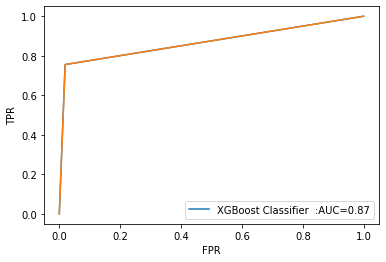

In [33]:
y_pred_xgb_clf = xgb.predict(testx)
results(y_pred_xgb_clf, testy,"XGBoost Classifier")

**interpretation :**<br>
Performed 5 folds randomly and searched for the best parameters.
we could see that othe scale_pos_weight has improved our model significantly.

### Question 14: Why ensemble methods are used for classification. How are they used?

**why:**<br>
Robustness: reduce variance of predictions which improves the accuracy.<br>
**how:**<br>
Fitting the model several times on the training datasets and combining the predictions and then using the mode for classification. each model trains on a different composition of the training set
<br>How bagging work:<br>
*Bootstrapping:* <br>
Bagging leverages a bootstrapping sampling technique to create diverse samples. <br>
*Parallel training:*<br> These bootstrap samples are then trained independently and in parallel with each other using weak or base learners.<br>
*Aggregation:* Finally, an average or a majority of the predictions are taken to compute a more accurate estimate. 
For classification problems, the class with the highest majority of votes is accepted; this is known as hard voting or majority voting.

### Question 15: How could you consider the costs of prediction errors into account when training your machine learning model?

We could use boosting method.<br>
Step 1:  The base learner takes all the distributions and assign equal weight or attention to each observation.
<br>
Step 2: If there is any prediction error caused by first base learning algorithm, then we pay higher attention to observations having prediction error. Then, we apply the next base learning algorithm.
<br>
Step 3: Iterate Step 2 till the limit of base learning algorithm is reached or higher accuracy is achieved.